In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics.pairwise import cosine_distances
from pycpd import RigidRegistration, DeformableRegistration, AffineRegistration
from functools import partial
%matplotlib inline

In [2]:
classes_highres = pd.read_csv("classes_highres144_in_lowres144.csv", header = None)
classes_highres.columns = ['identity']

embeddings_highres = pd.read_csv("emb_highres144_in_lowres144.csv", header = None)

In [3]:
classes_highres.head()

,identity
0,0
1,0
2,0
3,0
4,1


In [4]:
embeddings_highres.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.222777,0.208014,-1.253294,0.322227,0.999592,-0.007908,-1.031664,0.331121,0.954402,0.846915,...,-0.655622,-0.025873,-0.404949,-0.701449,-0.194063,0.713904,-1.127098,0.587889,-0.563111,0.167791
1,-0.454564,-2.056465,-1.576744,-1.397676,2.231308,-0.951393,-1.402116,0.827623,0.025647,0.254956,...,-1.934835,1.095834,0.092642,-0.942613,-0.273486,-0.824422,-0.731564,0.019855,1.107044,-0.695495
2,0.254816,-1.309766,-0.875243,-0.467836,0.679478,-0.111871,-1.448756,0.138017,-0.354890,0.341773,...,0.361791,0.148282,-0.630819,-1.267557,-0.018659,0.119247,-1.629803,1.201011,1.004834,0.575794
3,0.211211,0.403162,-0.567285,-0.856952,1.539070,-0.062858,-1.099550,0.563717,0.044147,2.014178,...,-1.238504,1.045844,0.344964,-0.889390,-0.560957,1.550678,-0.908249,1.011835,-0.141934,-0.399694
4,-0.064878,0.484843,0.395487,1.110037,0.061129,0.898703,-1.052222,0.096475,2.504262,2.772602,...,-1.509702,-0.164985,1.163143,0.875474,-0.686403,-0.155363,-0.074418,1.049319,0.658300,-1.131163


In [5]:
classes_highres_downup = pd.read_csv("classes_highres32_in_lowres144.csv", header = None)
classes_highres_downup.columns = ['identity']

embeddings_highres_downup = pd.read_csv("emb_highres32_in_lowres144.csv", header = None)

In [6]:
classes_highres_downup.head()

,identity
0,0
1,0
2,0
3,0
4,1


In [7]:
embeddings_highres_downup.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.642206,0.556890,-0.702342,-0.632479,1.060185,0.278782,-0.793226,0.493909,0.127981,0.191581,...,-0.772069,-0.409897,-0.612013,-0.151772,0.180245,0.158250,-1.187522,0.334850,0.146972,-0.696644
1,-0.250955,-1.872249,-1.079116,-1.253712,1.206817,-0.237232,-0.210390,0.303086,-0.366630,-1.333838,...,-1.257578,1.391058,0.370132,-0.311786,-0.312953,-0.575203,-0.849970,-0.441748,1.012123,-1.640617
2,0.533991,-0.583466,-0.434306,-0.260697,0.524646,-0.278926,-1.473347,-1.444980,-0.485081,-1.581554,...,1.660586,1.004672,0.277353,-0.279121,-0.357653,0.333844,-1.334144,0.849582,0.187671,-0.180726
3,-0.017650,0.807057,-0.058413,-1.522040,1.669225,0.014698,-1.046674,-0.030890,-0.083672,1.219495,...,-1.440219,-0.550033,0.336577,0.633899,-0.051806,0.556248,-2.505525,1.531981,-0.031602,-0.493589
4,-0.568726,0.676090,-0.408490,0.480657,0.753273,0.751103,-0.505637,0.216642,2.353228,2.207113,...,-1.325655,0.120682,1.394198,0.726451,-0.822039,-0.673891,-0.165745,0.894559,0.522937,-1.399876


In [8]:
all_embeddings = pd.concat([embeddings_highres, embeddings_highres_downup], axis= 0, ignore_index = True)
all_classes = pd.concat([classes_highres, classes_highres_downup], axis= 0, ignore_index = True)

In [9]:
pca_highres = PCA(n_components=3)
pca_highres_downup = PCA(n_components=3)
pca_all = PCA(n_components=3)

pca_highres_3 = pca_highres.fit_transform(embeddings_highres)
pca_highres_downup_3 = pca_highres.fit_transform(embeddings_highres_downup)
pca_all_3 = pca_all.fit_transform(all_embeddings)

In [10]:
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

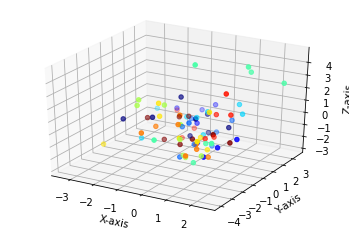

Sum cosine distance 577.3692813114537 Mean cosine distance: 1.1547385626229074


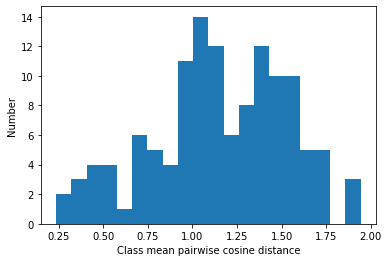

In [11]:
# SEPARATE PCA
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nb_class = 10*4

x_highres  = pca_highres_3[:nb_class,0]
y_highres = pca_highres_3[:nb_class,1]
z_highres  = pca_highres_3[:nb_class,2]

x_highres_downup  = pca_highres_downup_3[:nb_class,0]
y_highres_downup  = pca_highres_downup_3[:nb_class,1]
z_highres_downup  = pca_highres_downup_3[:nb_class,2]

# Plot the values
ax.scatter(x_highres, y_highres, z_highres, c = classes_highres[:nb_class], cmap=cmap)
ax.scatter(x_highres_downup, y_highres_downup, z_highres_downup, c = classes_highres_downup[:nb_class], cmap=cmap)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

cos_distance_embeddings = cosine_distances(pca_highres_3[:500],pca_highres_downup_3[:500])
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
print("Sum cosine distance", sum(distances), "Mean cosine distance:", sum(distances)/len(distances))

number_class = int(500 / 4)
pairwise_mean_class_distances = []

for i in range(number_class):
    pairwise_mean_class_distances.append(sum(distances[(i*4):(i*4)+4])/4)

plt.hist(pairwise_mean_class_distances, density=False, bins=20)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Class mean pairwise cosine distance')
plt.show()

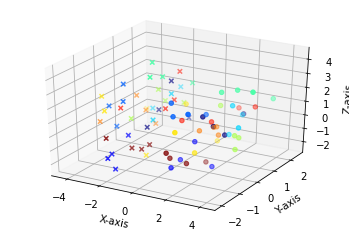

Sum pairwise cosine distance 495.7589268383217 Mean pairwise cosine distance: 0.9915178536766435


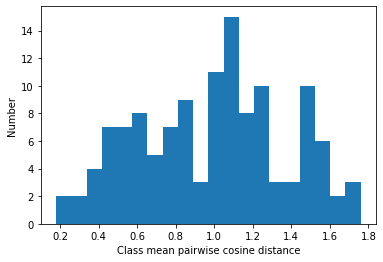

In [12]:
# COMBINED PCA
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nb_class = 10*4

x_highres  = pca_all_3[:nb_class,0]
y_highres = pca_all_3[:nb_class,1]
z_highres  = pca_all_3[:nb_class,2]

middle_point = int(pca_all_3.shape[0]/2)

x_highres_downup  = pca_all_3[middle_point:middle_point + nb_class,0]
y_highres_downup  = pca_all_3[middle_point:middle_point + nb_class,1]
z_highres_downup  = pca_all_3[middle_point:middle_point +nb_class,2]

# Plot the values
ax.scatter(x_highres, y_highres, z_highres, c = all_classes[:nb_class], cmap=cmap, marker = 'o')

ax.scatter(x_highres_downup, y_highres_downup, z_highres_downup, c = all_classes[middle_point:middle_point +nb_class], cmap=cmap, marker = 'x')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

cos_distance_embeddings = cosine_distances(pca_all_3[:500],pca_all_3[middle_point:middle_point + 500])
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
print("Sum pairwise cosine distance", sum(distances), "Mean pairwise cosine distance:", sum(distances)/len(distances))

number_class = int(500 / 4)
pairwise_mean_class_distances = []

for i in range(number_class):
    pairwise_mean_class_distances.append(sum(distances[(i*4):(i*4)+4])/4)

plt.hist(pairwise_mean_class_distances, density=False, bins=20)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Class mean pairwise cosine distance')
plt.show()

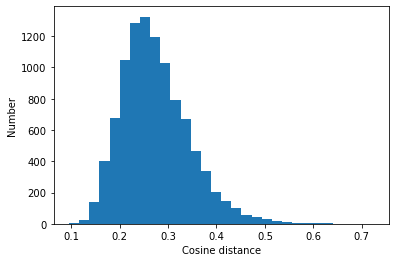

In [13]:
# COSINE DISTANCE FULL EMBEDDINGS
cos_distance_embeddings = cosine_distances(embeddings_highres, embeddings_highres_downup)
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
plt.hist(distances, density=False, bins=30)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Cosine distance')
plt.show()

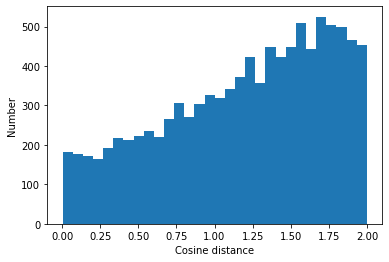

In [14]:
# COSINE DISTANCE SEPARATE PCA
cos_distance_embeddings = cosine_distances(pca_highres_3,pca_highres_downup_3)
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
plt.hist(distances, density=False, bins=30)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Cosine distance')
plt.show()

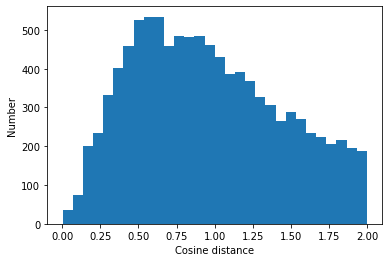

In [15]:
# COSINE DISTANCE COMBINED PCA
cos_distance_embeddings = cosine_distances(pca_all_3[:middle_point],pca_all_3[middle_point:])
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
plt.hist(distances, density=False, bins=30)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Cosine distance')
plt.show()

In [16]:
def visualize(iteration, error, X, Y, ax):
    plt.cla()
    ax.scatter(X[:, 0],  X[:, 1], X[:, 2], color='red', label='Target')
    ax.scatter(Y[:, 0],  Y[:, 1], Y[:, 2], color='blue', label='Source')
    ax.text2D(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
        iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
    ax.legend(loc='upper left', fontsize='x-large')
    plt.draw()

RIGID REGISTRATION ON SEPARATE PCA


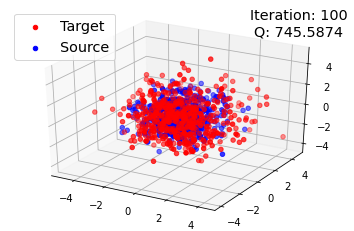

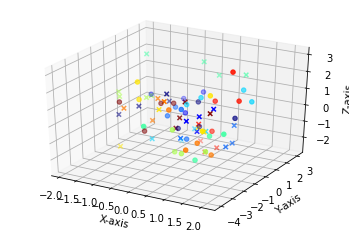

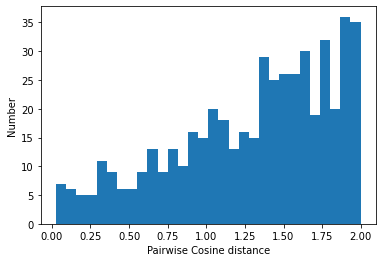

Sum pairwise cosine distance 648.9041421627423 Mean pairwise cosine distance: 1.2978082843254848


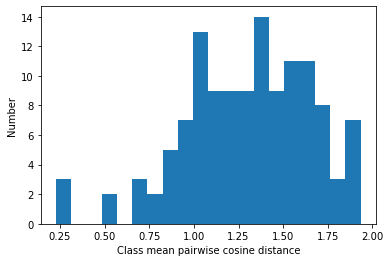

RIGID REGISTRATION ON COMBINED PCA


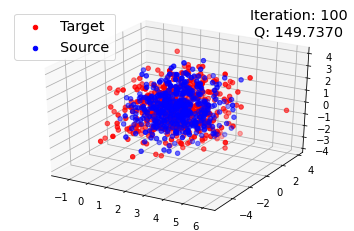

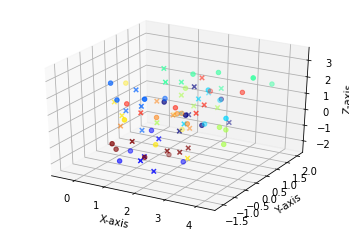

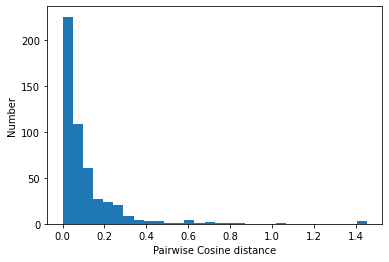

Sum pairwise cosine distance 54.25227346884918 Mean pairwise cosine distance: 0.10850454693769837


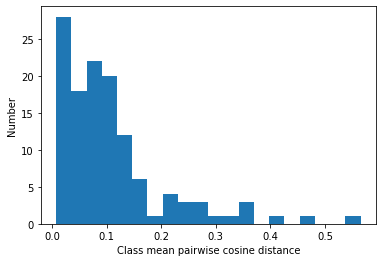

In [17]:
print("RIGID REGISTRATION ON SEPARATE PCA")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
callback = partial(visualize, ax=ax)

rigid_reg = RigidRegistration(**{'X': pca_highres_3[:500], 'Y': pca_highres_downup_3[:500]})
rigid_reg.register(callback)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nb_class = 10*4

x_highres  = pca_highres_3[:nb_class,0]
y_highres = pca_highres_3[:nb_class,1]
z_highres  = pca_highres_3[:nb_class,2]

x_highres_downup  = rigid_reg.TY[:nb_class,0]
y_highres_downup  = rigid_reg.TY[:nb_class,1]
z_highres_downup  = rigid_reg.TY[:nb_class,2]

# Plot the values
ax.scatter(x_highres, y_highres, z_highres, c = classes_highres[:nb_class], cmap=cmap, marker = 'o')

ax.scatter(x_highres_downup, y_highres_downup, z_highres_downup, c = classes_highres_downup[:nb_class], cmap=cmap, marker = 'x')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

cos_distance_embeddings = cosine_distances(pca_highres_3[:500], rigid_reg.TY)
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
plt.hist(distances, density=False, bins=30)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Pairwise Cosine distance')
plt.show()

print("Sum pairwise cosine distance", sum(distances), "Mean pairwise cosine distance:", sum(distances)/len(distances))

number_class = int(500 / 4)
pairwise_mean_class_distances = []

for i in range(number_class):
    pairwise_mean_class_distances.append(sum(distances[(i*4):(i*4)+4])/4)

plt.hist(pairwise_mean_class_distances, density=False, bins=20)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Class mean pairwise cosine distance')
plt.show()

print("RIGID REGISTRATION ON COMBINED PCA")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
callback = partial(visualize, ax=ax)

rigid_reg = RigidRegistration(**{'X': pca_all_3[:500], 'Y': pca_all_3[middle_point:middle_point + 500]})
rigid_reg.register(callback)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nb_class = 10*4

x_highres  = pca_all_3[:nb_class,0]
y_highres = pca_all_3[:nb_class,1]
z_highres  = pca_all_3[:nb_class,2]

x_highres_downup  = rigid_reg.TY[:nb_class,0]
y_highres_downup  = rigid_reg.TY[:nb_class,1]
z_highres_downup  = rigid_reg.TY[:nb_class,2]

# Plot the values
ax.scatter(x_highres, y_highres, z_highres, c = all_classes[:nb_class], cmap=cmap, marker = 'o')
ax.scatter(x_highres_downup, y_highres_downup, z_highres_downup, c = all_classes[middle_point:middle_point +nb_class], cmap=cmap, marker = 'x')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

cos_distance_embeddings = cosine_distances(pca_all_3[:500],rigid_reg.TY)
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
plt.hist(distances, density=False, bins=30)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Pairwise Cosine distance')
plt.show()

print("Sum pairwise cosine distance", sum(distances), "Mean pairwise cosine distance:", sum(distances)/len(distances))

number_class = int(500 / 4)
pairwise_mean_class_distances = []

for i in range(number_class):
    pairwise_mean_class_distances.append(sum(distances[(i*4):(i*4)+4])/4)

plt.hist(pairwise_mean_class_distances, density=False, bins=20)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Class mean pairwise cosine distance')
plt.show()



DEFORMABLE REGISTRATION ON SEPARATE PCA


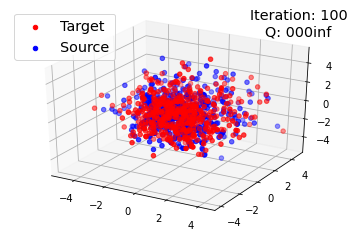

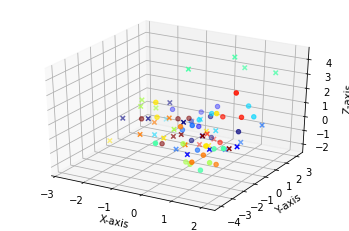

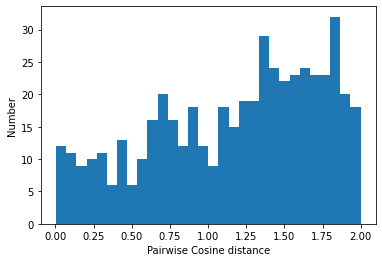

Sum pairwise cosine distance 588.9104100166453 Mean pairwise cosine distance: 1.1778208200332907


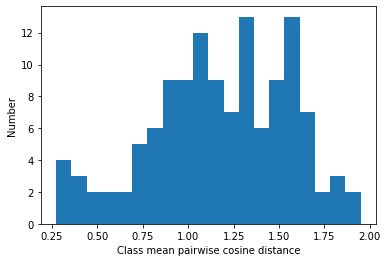

DEFORMABLE REGISTRATION ON COMBINED PCA


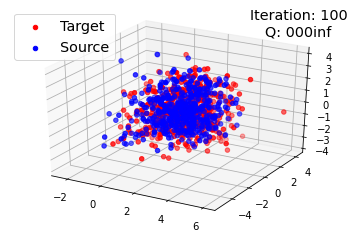

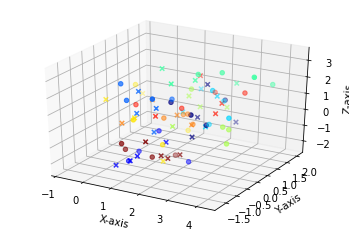

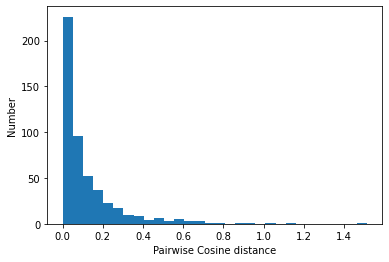

Sum pairwise cosine distance 60.82543942554121 Mean pairwise cosine distance: 0.12165087885108243


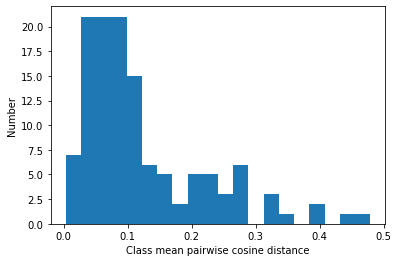

In [18]:
print("DEFORMABLE REGISTRATION ON SEPARATE PCA")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
callback = partial(visualize, ax=ax)

deform_reg = DeformableRegistration(**{'X': pca_highres_3[:500], 'Y': pca_highres_downup_3[:500]})
deform_reg.register(callback)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nb_class = 10*4

x_highres  = pca_highres_3[:nb_class,0]
y_highres = pca_highres_3[:nb_class,1]
z_highres  = pca_highres_3[:nb_class,2]

x_highres_downup  = deform_reg.TY[:nb_class,0]
y_highres_downup  = deform_reg.TY[:nb_class,1]
z_highres_downup  = deform_reg.TY[:nb_class,2]

# Plot the values
ax.scatter(x_highres, y_highres, z_highres, c = classes_highres[:nb_class], cmap=cmap, marker = 'o')

ax.scatter(x_highres_downup, y_highres_downup, z_highres_downup, c = classes_highres_downup[:nb_class], cmap=cmap, marker = 'x')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

cos_distance_embeddings = cosine_distances(pca_highres_3[:500], deform_reg.TY)
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
plt.hist(distances, density=False, bins=30)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Pairwise Cosine distance')
plt.show()

print("Sum pairwise cosine distance", sum(distances), "Mean pairwise cosine distance:", sum(distances)/len(distances))

number_class = int(500 / 4)
pairwise_mean_class_distances = []

for i in range(number_class):
    pairwise_mean_class_distances.append(sum(distances[(i*4):(i*4)+4])/4)

plt.hist(pairwise_mean_class_distances, density=False, bins=20)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Class mean pairwise cosine distance')
plt.show()

print("DEFORMABLE REGISTRATION ON COMBINED PCA")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
callback = partial(visualize, ax=ax)

deform_reg = DeformableRegistration(**{'X': pca_all_3[:500], 'Y': pca_all_3[middle_point:middle_point + 500]})
deform_reg.register(callback)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nb_class = 10*4

x_highres  = pca_all_3[:nb_class,0]
y_highres = pca_all_3[:nb_class,1]
z_highres  = pca_all_3[:nb_class,2]

x_highres_downup  = deform_reg.TY[:nb_class,0]
y_highres_downup  = deform_reg.TY[:nb_class,1]
z_highres_downup  = deform_reg.TY[:nb_class,2]

# Plot the values
ax.scatter(x_highres, y_highres, z_highres, c = all_classes[:nb_class], cmap=cmap, marker = 'o')
ax.scatter(x_highres_downup, y_highres_downup, z_highres_downup, c = all_classes[middle_point:middle_point +nb_class], cmap=cmap, marker = 'x')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

cos_distance_embeddings = cosine_distances(pca_all_3[:500],deform_reg.TY)
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
plt.hist(distances, density=False, bins=30)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Pairwise Cosine distance')
plt.show()

print("Sum pairwise cosine distance", sum(distances), "Mean pairwise cosine distance:", sum(distances)/len(distances))

number_class = int(500 / 4)
pairwise_mean_class_distances = []

for i in range(number_class):
    pairwise_mean_class_distances.append(sum(distances[(i*4):(i*4)+4])/4)

plt.hist(pairwise_mean_class_distances, density=False, bins=20)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Class mean pairwise cosine distance')
plt.show()

AFFINE REGISTRATION ON SEPARATE PCA


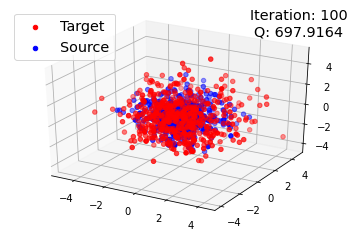

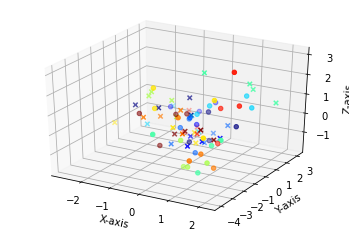

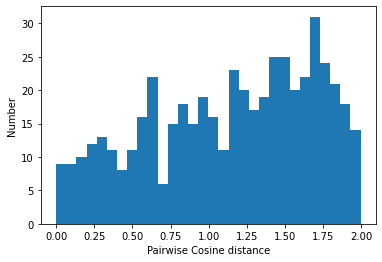

Sum pairwise cosine distance 570.3109211988389 Mean pairwise cosine distance: 1.1406218423976777


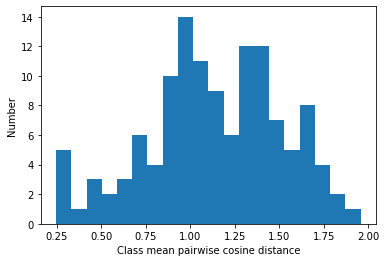

AFFINE REGISTRATION ON COMBINED PCA


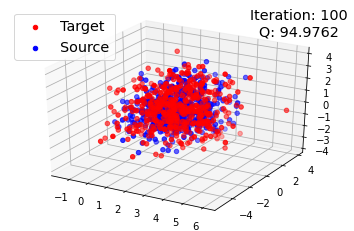

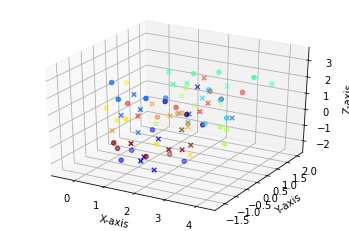

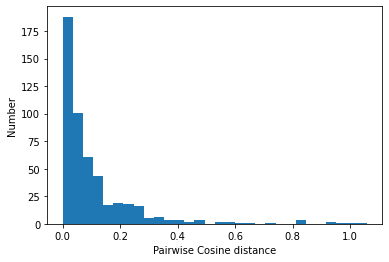

Sum pairwise cosine distance 52.81217120525099 Mean pairwise cosine distance: 0.10562434241050198


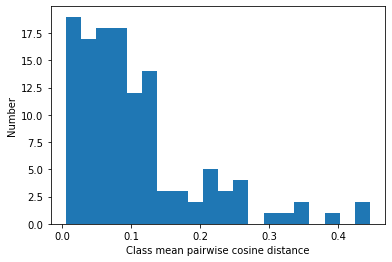

In [19]:
print("AFFINE REGISTRATION ON SEPARATE PCA")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
callback = partial(visualize, ax=ax)

affine_reg = AffineRegistration(**{'X': pca_highres_3[:500], 'Y': pca_highres_downup_3[:500]})
affine_reg.register(callback)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nb_class = 10*4

x_highres  = pca_highres_3[:nb_class,0]
y_highres = pca_highres_3[:nb_class,1]
z_highres  = pca_highres_3[:nb_class,2]

x_highres_downup  = affine_reg.TY[:nb_class,0]
y_highres_downup  = affine_reg.TY[:nb_class,1]
z_highres_downup  = affine_reg.TY[:nb_class,2]

# Plot the values
ax.scatter(x_highres, y_highres, z_highres, c = classes_highres[:nb_class], cmap=cmap, marker = 'o')

ax.scatter(x_highres_downup, y_highres_downup, z_highres_downup, c = classes_highres_downup[:nb_class], cmap=cmap, marker = 'x')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

cos_distance_embeddings = cosine_distances(pca_highres_3[:500], affine_reg.TY)
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
plt.hist(distances, density=False, bins=30)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Pairwise Cosine distance')
plt.show()

print("Sum pairwise cosine distance", sum(distances), "Mean pairwise cosine distance:", sum(distances)/len(distances))

number_class = int(500 / 4)
pairwise_mean_class_distances = []

for i in range(number_class):
    pairwise_mean_class_distances.append(sum(distances[(i*4):(i*4)+4])/4)

plt.hist(pairwise_mean_class_distances, density=False, bins=20)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Class mean pairwise cosine distance')
plt.show()

print("AFFINE REGISTRATION ON COMBINED PCA")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
callback = partial(visualize, ax=ax)

affine_reg = AffineRegistration(**{'X': pca_all_3[:500], 'Y': pca_all_3[middle_point:middle_point + 500]})
affine_reg.register(callback)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nb_class = 10*4

x_highres  = pca_all_3[:nb_class,0]
y_highres = pca_all_3[:nb_class,1]
z_highres  = pca_all_3[:nb_class,2]

x_highres_downup  = affine_reg.TY[:nb_class,0]
y_highres_downup  = affine_reg.TY[:nb_class,1]
z_highres_downup  = affine_reg.TY[:nb_class,2]

# Plot the values
ax.scatter(x_highres, y_highres, z_highres, c = all_classes[:nb_class], cmap=cmap, marker = 'o')
ax.scatter(x_highres_downup, y_highres_downup, z_highres_downup, c = all_classes[middle_point:middle_point +nb_class], cmap=cmap, marker = 'x')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

cos_distance_embeddings = cosine_distances(pca_all_3[:500],affine_reg.TY)
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
plt.hist(distances, density=False, bins=30)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Pairwise Cosine distance')
plt.show()

print("Sum pairwise cosine distance", sum(distances), "Mean pairwise cosine distance:", sum(distances)/len(distances))

number_class = int(500 / 4)
pairwise_mean_class_distances = []

for i in range(number_class):
    pairwise_mean_class_distances.append(sum(distances[(i*4):(i*4)+4])/4)

plt.hist(pairwise_mean_class_distances, density=False, bins=20)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Class mean pairwise cosine distance')
plt.show()

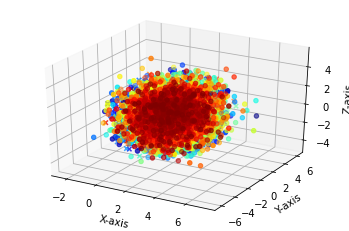

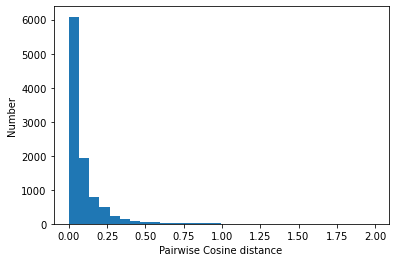

Sum pairwise cosine distance 956.9562535384022 Mean pairwise cosine distance: 0.09569562535384021


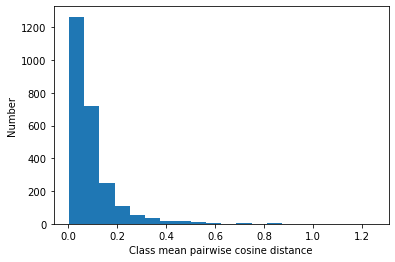

In [20]:
# TRANSFORMATION OF OTHER POINTS BASED ON AFFINE REGISTRATION ON COMBINED PCA

transformed_all_pca3_downup = affine_reg.transform_point_cloud(pca_all_3[middle_point:])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_highres  = pca_all_3[:middle_point,0]
y_highres = pca_all_3[:middle_point,1]
z_highres  = pca_all_3[:middle_point,2]

x_highres_downup  = transformed_all_pca3_downup[:,0]
y_highres_downup  = transformed_all_pca3_downup[:,1]
z_highres_downup  = transformed_all_pca3_downup[:,2]

# Plot the values
ax.scatter(x_highres, y_highres, z_highres, c = classes_highres, cmap=cmap, marker = 'o')

ax.scatter(x_highres_downup, y_highres_downup, z_highres_downup, c = classes_highres_downup, cmap=cmap, marker = 'x')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

cos_distance_embeddings = cosine_distances(pca_all_3[:middle_point], transformed_all_pca3_downup)
distances = [cos_distance_embeddings[i,i] for i in range(cos_distance_embeddings.shape[0])]
plt.hist(distances, density=False, bins=30)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Pairwise Cosine distance')
plt.show()

print("Sum pairwise cosine distance", sum(distances), "Mean pairwise cosine distance:", sum(distances)/len(distances))

number_class = int(middle_point / 4)
pairwise_mean_class_distances = []

for i in range(number_class):
    pairwise_mean_class_distances.append(sum(distances[(i*4):(i*4)+4])/4)

plt.hist(pairwise_mean_class_distances, density=False, bins=20)  # density=False would make counts
plt.ylabel('Number')
plt.xlabel('Class mean pairwise cosine distance')
plt.show()
